# 1 - Introduction

Dataset: 

https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection

Objective: 

Membuat model untuk mendeteksi penipuan klaim asuransi kendaraan bermotor berdasarkan detail informasi peserta asuransi dan kendaraan seperti polis, tenor, detail kejadian dll.

# 2 - Import Libraries

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import json
import pickle

# 3 - Data Loading

In [84]:
df = pd.read_csv('fraud_oracle.csv')
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [86]:
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [87]:
df_eda = df.copy()

# 4 - Exploratory Data Analysis

In [88]:
df_eda.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [89]:
df_eda.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


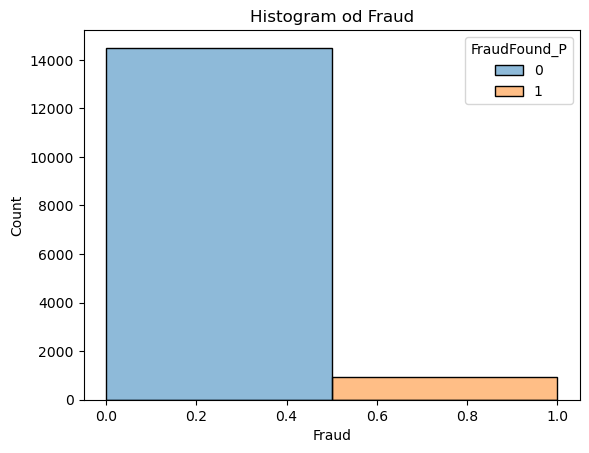

In [90]:
sns.histplot(df_eda, x='FraudFound_P',bins=2, hue='FraudFound_P')

# Add labels and title
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Histogram od Fraud')

# Display the plot
plt.show()

In [91]:
df_eda['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

Insight:

Terdapat 923 kasus penipuan klaim asuransi

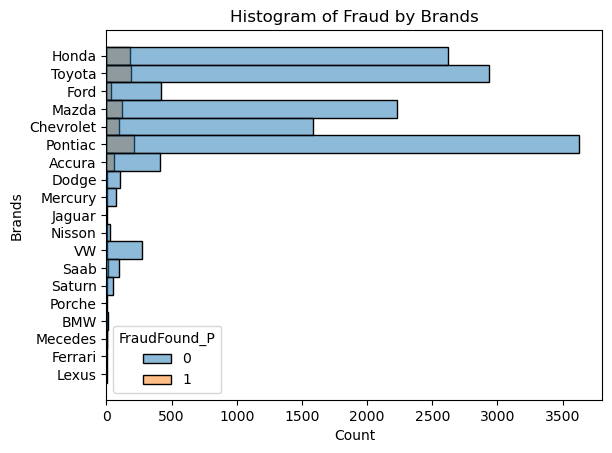

In [92]:
sns.histplot(df_eda, y='Make', bins=10, kde=False, hue='FraudFound_P')

plt.xlabel('Count')
plt.ylabel('Brands')
plt.title('Histogram of Fraud by Brands')

plt.show()

In [93]:
df_eda.groupby(['FraudFound_P', 'Make']).size().reset_index(name='Count')

,FraudFound_P,Make,Count
0,0,Accura,413
1,0,BMW,14
2,0,Chevrolet,1587
3,0,Dodge,107
4,0,Ferrari,2
5,0,Ford,417
6,0,Honda,2622
7,0,Jaguar,6
8,0,Lexus,1
9,0,Mazda,2231


Insight:

Tiga brand teratas dalam penipuan klaim asuransi adalah Pontiac dengan 213 kasus, Honda 179 kasus dan Toyota 186 kasus.

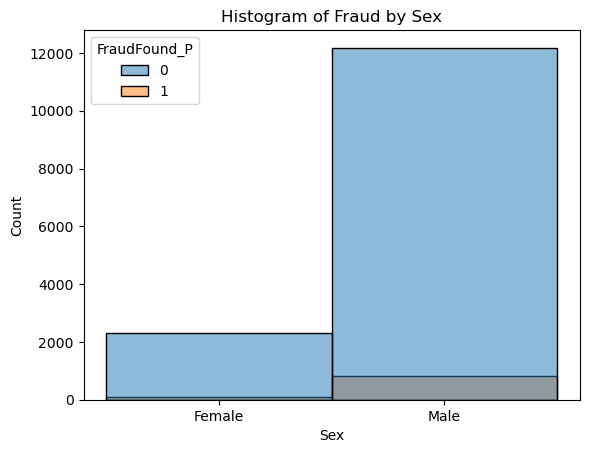

In [94]:
sns.histplot(df_eda, x='Sex',bins=2, hue='FraudFound_P')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Histogram of Fraud by Sex')

plt.show()

In [95]:
df_eda.groupby(['FraudFound_P', 'Sex']).size().reset_index(name='Count')

,FraudFound_P,Sex,Count
0,0,Female,2315
1,0,Male,12182
2,1,Female,105
3,1,Male,818


Insight:

Pelaku penipuan klaim asuransi kendaraan didominasi oleh pria

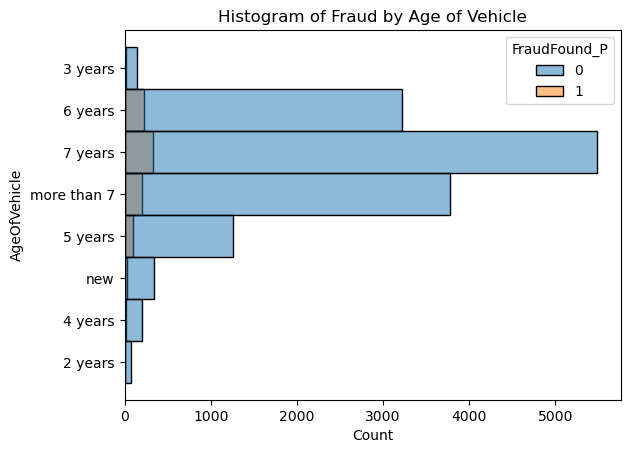

In [96]:
sns.histplot(df_eda, y='AgeOfVehicle',bins=2, hue='FraudFound_P')

plt.xlabel('Count')
plt.ylabel('AgeOfVehicle')
plt.title('Histogram of Fraud by Age of Vehicle')

plt.show()

In [97]:
df_eda.groupby(['FraudFound_P', 'AgeOfVehicle']).size().reset_index(name='Count')

,FraudFound_P,AgeOfVehicle,Count
0,0,2 years,70
1,0,3 years,139
2,0,4 years,208
3,0,5 years,1262
4,0,6 years,3220
5,0,7 years,5482
6,0,more than 7,3775
7,0,new,341
8,1,2 years,3
9,1,3 years,13


Insight:

Penipuan klaim asuransi kendaraan umumnya terjadi pada kendaraan yang berusia 6 tahun keatas

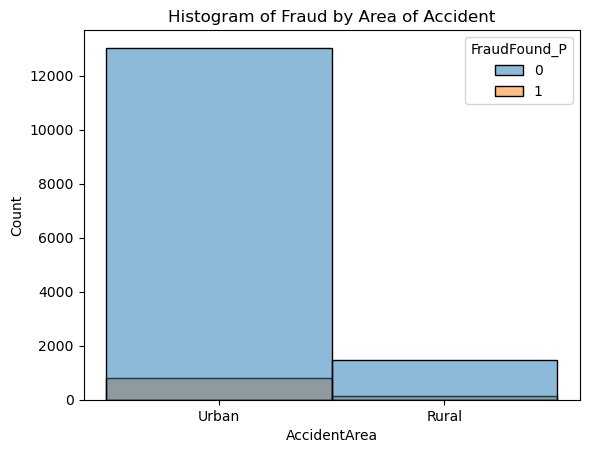

In [98]:
sns.histplot(df_eda, x='AccidentArea',bins=2, hue='FraudFound_P')

plt.xlabel('AccidentArea')
plt.ylabel('Count')
plt.title('Histogram of Fraud by Area of Accident')

plt.show()

In [99]:
df_eda.groupby(['FraudFound_P', 'AccidentArea']).size().reset_index(name='Count')

,FraudFound_P,AccidentArea,Count
0,0,Rural,1465
1,0,Urban,13032
2,1,Rural,133
3,1,Urban,790


Insight:

Area kecelakaan yang disengaja dari kasus penipuan asuransi kendaraan banyaknya terjadi di daerah perkotaan (urban)

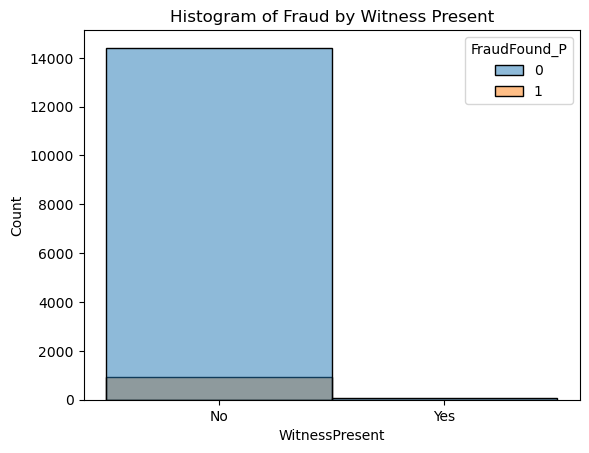

In [100]:
sns.histplot(df_eda, x='WitnessPresent',bins=2, hue='FraudFound_P')

plt.xlabel('WitnessPresent')
plt.ylabel('Count')
plt.title('Histogram of Fraud by Witness Present')

plt.show()

In [101]:
df_eda.groupby(['FraudFound_P', 'WitnessPresent']).size().reset_index(name='Count')

,FraudFound_P,WitnessPresent,Count
0,0,No,14413
1,0,Yes,84
2,1,No,920
3,1,Yes,3


Insight:

Kasus penipuan klaim asuransi kendaraan biasanya tidak disertai adanya saksi

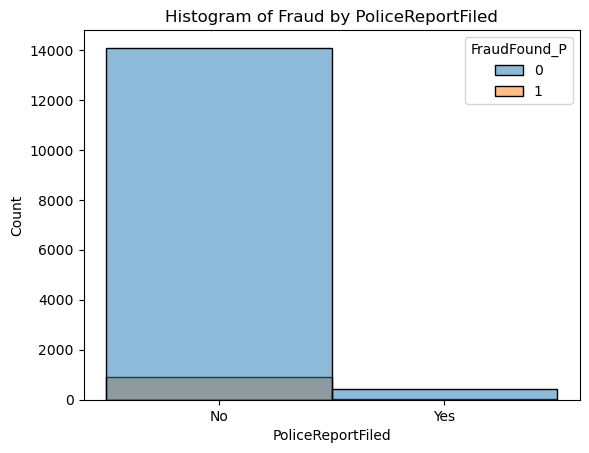

In [102]:
sns.histplot(df_eda, x='PoliceReportFiled',bins=2, hue='FraudFound_P')

# Add labels and title
plt.xlabel('PoliceReportFiled')
plt.ylabel('Count')
plt.title('Histogram of Fraud by PoliceReportFiled')

# Display the plot
plt.show()

In [103]:
df_eda.groupby(['FraudFound_P', 'PoliceReportFiled']).size().reset_index(name='Count')

,FraudFound_P,PoliceReportFiled,Count
0,0,No,14085
1,0,Yes,412
2,1,No,907
3,1,Yes,16


Insight:

Kasus penipuan klaim asuransi kendaraan biasanya tidak disertai adanya laporan polisi

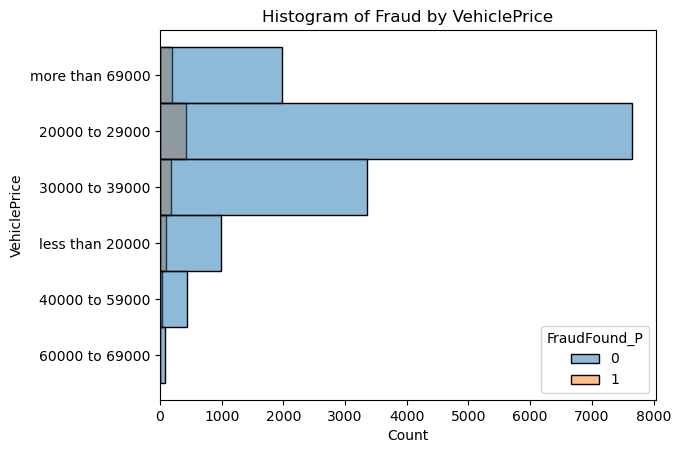

In [104]:
sns.histplot(df_eda, y='VehiclePrice',bins=2, hue='FraudFound_P')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('VehiclePrice')
plt.title('Histogram of Fraud by VehiclePrice')

# Display the plot
plt.show()

In [105]:
df_eda.groupby(['FraudFound_P', 'VehiclePrice']).size().reset_index(name='Count')

,FraudFound_P,VehiclePrice,Count
0,0,20000 to 29000,7658
1,0,30000 to 39000,3358
2,0,40000 to 59000,430
3,0,60000 to 69000,83
4,0,less than 20000,993
5,0,more than 69000,1975
6,1,20000 to 29000,421
7,1,30000 to 39000,175
8,1,40000 to 59000,31
9,1,60000 to 69000,4


Insight:

Umumnya penipu klaim asuransi memiliki kendaraan yang bernilai dibawah 40000 usd

In [106]:
correlation_matrix = df_eda.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12896\3622915021.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_eda.corr()


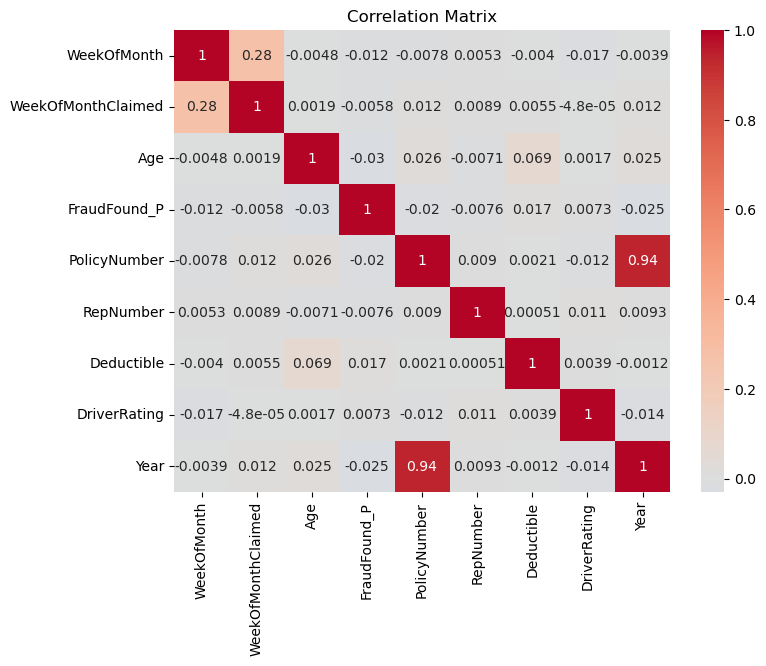

In [107]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# 5 - Feature Engineering

## Split between `X` (Features) and `y` (Target) and Feature Selection

In [108]:
X = df.drop(['FraudFound_P'], axis=1)
y = df['FraudFound_P']
X

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


## Split between Train-set and Test-set

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
X_train

Train Size :  (12336, 32)
Test Size :  (3084, 32)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
10590,Mar,1,Monday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,6 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1995,Collision
15132,Oct,4,Saturday,Toyota,Urban,Thursday,Oct,4,Male,Single,...,6 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,Collision
10284,Feb,2,Sunday,Honda,Urban,Tuesday,Feb,3,Male,Single,...,5 years,26 to 30,No,No,External,none,no change,1 vehicle,1995,Liability
15015,Nov,3,Wednesday,Pontiac,Urban,Wednesday,Nov,3,Male,Single,...,6 years,31 to 35,No,No,External,1 to 2,1 year,2 vehicles,1996,Collision
11706,May,4,Saturday,Pontiac,Urban,Friday,Jun,1,Female,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,Jun,1,Saturday,Honda,Urban,Tuesday,Aug,2,Male,Married,...,7 years,36 to 40,No,No,External,more than 5,no change,1 vehicle,1995,Liability
406,Jul,1,Monday,Chevrolet,Urban,Thursday,Jul,1,Male,Married,...,6 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,1994,Liability
13702,May,2,Wednesday,Pontiac,Urban,Monday,Jun,3,Male,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
2191,Mar,2,Tuesday,Mazda,Urban,Wednesday,Mar,2,Male,Married,...,6 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,1994,Liability


## Split between Numeric Columns and Category Columns

In [110]:
# Get Numeric Columns and Category Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']
Cat Columns :  ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


In [111]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
10590,1,2,34,10591,6,400,2,1995
15132,4,4,26,15133,11,400,1,1996
10284,2,3,24,10285,5,400,3,1995
15015,3,3,34,15016,10,400,1,1996
11706,4,1,32,11707,6,400,4,1996
...,...,...,...,...,...,...,...,...
9529,1,2,38,9530,15,400,3,1995
406,1,1,32,407,4,400,3,1994
13702,2,3,28,13703,12,400,1,1996
2191,2,2,26,2192,5,400,3,1994


## Feature Scaling

In [112]:
# Display `X_train`

X_train_num

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
10590,1,2,34,10591,6,400,2,1995
15132,4,4,26,15133,11,400,1,1996
10284,2,3,24,10285,5,400,3,1995
15015,3,3,34,15016,10,400,1,1996
11706,4,1,32,11707,6,400,4,1996
...,...,...,...,...,...,...,...,...
9529,1,2,38,9530,15,400,3,1995
406,1,1,32,407,4,400,3,1994
13702,2,3,28,13703,12,400,1,1996
2191,2,2,26,2192,5,400,3,1994


In [113]:
X_train_num.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,12336.000000,12336.000000,12336.00000,12336.000000,12336.000000,12336.000000,12336.000000,12336.000000
mean,2.784452,2.693418,39.90702,7720.307474,8.500243,407.498379,2.489867,1994.868920
std,1.282727,1.262554,13.54721,4455.060484,4.608728,43.495803,1.120930,0.803672
min,1.000000,1.000000,0.00000,2.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.00000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.00000,7748.500000,9.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,49.00000,11575.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.00000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [114]:
# Feature Scaling using MinMaxScaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[-1.39119608, -0.54924061, -0.43604989, ..., -0.17240014,
        -0.4370361 ,  0.16310761],
       [ 0.94766662,  1.03491467, -1.02660132, ..., -0.17240014,
        -1.32918856,  1.40744621],
       [-0.61157518,  0.24283703, -1.17423917, ..., -0.17240014,
         0.45511636,  0.16310761],
       ...,
       [-0.61157518,  0.24283703, -0.87896346, ..., -0.17240014,
        -1.32918856,  1.40744621],
       [-0.61157518, -0.54924061, -1.02660132, ..., -0.17240014,
         0.45511636, -1.08123098],
       [ 0.94766662,  1.03491467, -1.2480581 , ..., -0.17240014,
         1.34726882,  0.16310761]])

## Feature Encoding

In [115]:
# Display `X_train_cat`

X_train_cat

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
10590,Mar,Monday,Honda,Urban,Tuesday,Mar,Male,Single,Third Party,Sedan - Collision,...,2 to 4,6 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,Collision
15132,Oct,Saturday,Toyota,Urban,Thursday,Oct,Male,Single,Third Party,Sedan - Collision,...,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,Collision
10284,Feb,Sunday,Honda,Urban,Tuesday,Feb,Male,Single,Third Party,Sedan - Liability,...,2 to 4,5 years,26 to 30,No,No,External,none,no change,1 vehicle,Liability
15015,Nov,Wednesday,Pontiac,Urban,Wednesday,Nov,Male,Single,Policy Holder,Sedan - Collision,...,none,6 years,31 to 35,No,No,External,1 to 2,1 year,2 vehicles,Collision
11706,May,Saturday,Pontiac,Urban,Friday,Jun,Female,Married,Policy Holder,Sedan - Collision,...,1,6 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,Jun,Saturday,Honda,Urban,Tuesday,Aug,Male,Married,Third Party,Sedan - Liability,...,2 to 4,7 years,36 to 40,No,No,External,more than 5,no change,1 vehicle,Liability
406,Jul,Monday,Chevrolet,Urban,Thursday,Jul,Male,Married,Policy Holder,Sedan - Liability,...,more than 4,6 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,Liability
13702,May,Wednesday,Pontiac,Urban,Monday,Jun,Male,Single,Policy Holder,Sedan - Collision,...,more than 4,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
2191,Mar,Tuesday,Mazda,Urban,Wednesday,Mar,Male,Married,Policy Holder,Sedan - Liability,...,1,6 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,Liability


In [116]:
# Feature Encoding using Ordinal Encoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_cat_encoded

array([[ 7.,  1.,  6., ...,  3.,  0.,  1.],
       [10.,  2., 17., ...,  3.,  0.,  1.],
       [ 3.,  3.,  6., ...,  3.,  0.,  2.],
       ...,
       [ 8.,  6., 13., ...,  3.,  0.,  1.],
       [ 7.,  5.,  9., ...,  3.,  0.,  2.],
       [ 8.,  4., 13., ...,  1.,  0.,  2.]])

## Concate between Numeric Columns and Category Columns

In [117]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[-1.39119608, -0.54924061, -0.43604989, ...,  3.        ,
         0.        ,  1.        ],
       [ 0.94766662,  1.03491467, -1.02660132, ...,  3.        ,
         0.        ,  1.        ],
       [-0.61157518,  0.24283703, -1.17423917, ...,  3.        ,
         0.        ,  2.        ],
       ...,
       [-0.61157518,  0.24283703, -0.87896346, ...,  3.        ,
         0.        ,  1.        ],
       [-0.61157518, -0.54924061, -1.02660132, ...,  3.        ,
         0.        ,  2.        ],
       [ 0.94766662,  1.03491467, -1.2480581 , ...,  1.        ,
         0.        ,  2.        ]])

In [118]:
# Create DataFrame of `X_train_final`

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year,Month,DayOfWeek,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,-1.391196,-0.549241,-0.436050,0.644393,-0.542524,-0.1724,-0.437036,0.163108,7.0,1.0,...,1.0,4.0,4.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0
1,0.947667,1.034915,-1.026601,1.663949,0.542418,-0.1724,-1.329189,1.407446,10.0,2.0,...,2.0,4.0,4.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0
2,-0.611575,0.242837,-1.174239,0.575704,-0.759512,-0.1724,0.455116,0.163108,3.0,3.0,...,1.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,2.0
3,0.168046,0.242837,-0.436050,1.637686,0.325430,-0.1724,-1.329189,1.407446,9.0,6.0,...,3.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.947667,-1.341318,-0.583688,0.894905,-0.542524,-0.1724,1.347269,1.407446,8.0,2.0,...,0.0,4.0,4.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12331,-1.391196,-0.549241,-0.140774,0.406227,1.410372,-0.1724,0.455116,0.163108,6.0,2.0,...,1.0,5.0,5.0,0.0,0.0,0.0,2.0,3.0,0.0,2.0
12332,-1.391196,-1.341318,-0.583688,-1.641640,-0.976501,-0.1724,0.455116,-1.081231,5.0,1.0,...,2.0,4.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0
12333,-0.611575,0.242837,-0.878963,1.342953,0.759407,-0.1724,-1.329189,1.407446,8.0,6.0,...,2.0,3.0,4.0,0.0,0.0,0.0,3.0,3.0,0.0,1.0
12334,-0.611575,-0.549241,-1.026601,-1.240955,-0.759512,-0.1724,0.455116,-1.081231,7.0,5.0,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0


# 6 - Model Definition

Model yang dibuat menggunakan algoritma klasifikasi yaitu Logistic Regression, SVM, dan Random Forest

## Define Pipeline

In [119]:
# Model SVM
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Model Logistic Regression
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Model Random Forest
rf_pipe = Pipeline([
    ('rf', RandomForestClassifier())
])

## Define Hyperparameter

In [120]:
# Parameter untuk SVM
svm_params = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': [0.1, 1, 'scale']
}

# Parameter untuk Logistic Regression
logreg_params = {
    'logreg__C': [0.1, 1, 10],
    'logreg__solver': ['liblinear', 'lbfgs']
}

# Parameter untuk Random Forest
rf_params = {
    'rf__n_estimators': [50, 100, 200],
    'rf__criterion': ['gini', 'entropy'],
    'rf__max_depth': [None, 5, 10, 20]
}


## Cross-Val

In [121]:
# Hyperparameter tuning untuk SVM
svm_grid = GridSearchCV(svm_pipe, svm_params, cv=5, n_jobs=-1)

# Hyperparameter tuning untuk Logistic Regression
logreg_grid = GridSearchCV(logreg_pipe, logreg_params, cv=5, n_jobs=-1)

# Hyperparameter tuning untuk Random Forest
rf_grid = GridSearchCV(rf_pipe, rf_params, cv=5, n_jobs=-1)

# 7 - Model Training

In [122]:
svm_grid.fit(X_train_final, y_train)
logreg_grid.fit(X_train_final, y_train)
rf_grid.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [None, 5, 10, 20],
                         'rf__n_estimators': [50, 100, 200]})

# 8 - Model Evaluation

In [123]:
# Evaluasi model SVM
svm_best_model = svm_grid.best_estimator_
svm_pred = svm_best_model.predict(X_test_final)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_pred))

# Evaluasi model Logistic Regression
logreg_best_model = logreg_grid.best_estimator_
logreg_pred = logreg_best_model.predict(X_test_final)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)
print(classification_report(y_test, logreg_pred))

# Evaluasi model Random Forest
rf_best_model = rf_grid.best_estimator_
rf_pred = rf_best_model.predict(X_test_final)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_pred))


SVM Accuracy: 0.9393644617380026
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2897
           1       0.00      0.00      0.00       187

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084

Logistic Regression Accuracy: 0.9393644617380026
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2897
           1       0.00      0.00      0.00       187

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084

Random Forest Accuracy: 0.9396887159533074
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2897
           1       1.00      0.01      0.01       187

    accuracy                           0.94      3084
   

c:\Users\Lenovo\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\miniconda3\lib\site-packages\skle

Insight:

Berdasarkan pada hasil evaluasi didapatkan model random forest lah yang memiliki performa terbaik dengan precision sebesar 97% dan accuracy sebesar 94%

# 9 - Model Saving

In [124]:
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('best_model_rf.pkl', 'wb') as file_5:
  pickle.dump(rf_best_model, file_5)


# 10 - Model Inference

## Load Model

In [125]:
# Load All Files

with open('best_model_rf.pkl', 'rb') as file_5:
  rf_best_model = pickle.load(file_5)

with open('model_scaler.pkl', 'rb') as file_3:
  model_scaler = pickle.load(file_3)

with open('model_encoder.pkl','rb') as file_4:
  model_encoder = pickle.load(file_4)

with open('list_num_cols.txt', 'r') as file_1:
  list_num_cols = json.load(file_1)

with open('list_cat_cols.txt', 'r') as file_2:
  list_cat_cols = json.load(file_2)

## Inferencing

In [126]:
# Create New Data

data_inf = {
    "Month":"Jan",
    "WeekOfMonth":2,
    "DayOfWeek":"Monday",
    "Make":"Pontiac",
    "AccidentArea":"Urban",
    "DayOfWeekClaimed":"Friday",
    "MonthClaimed":"Jan",
    "WeekOfMonthClaimed":3,
    "Sex":"Male",
    "MaritalStatus":"Married",
    "Age":33,
    "Fault":"Policy Holder",
    "PolicyType":"Sedan - Collision",
    "VehicleCategory":"Sedan",
    "VehiclePrice":"20000 to 29000",
    "PolicyNumber":534,
    "RepNumber":7,
    "Deductible":400,
    "DriverRating":3,
    "Days_Policy_Accident":"more than 30",
    "Days_Policy_Claim":"more than 30",
    "PastNumberOfClaims":"2 to 4",
    "AgeOfVehicle":"5 years",
    "AgeOfPolicyHolder":"31 to 35",
    "PoliceReportFiled":"No",
    "WitnessPresent":"No",
    "AgentType":"External",
    "NumberOfSuppliments":"1 to 2",
    "AddressChange_Claim":"no change",
    "NumberOfCars":"3 to 4",
    "Year":1994,
    "BasePolicy":"Collision"
}

data_inf = pd.DataFrame([data_inf])
data_inf

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Jan,2,Monday,Pontiac,Urban,Friday,Jan,3,Male,Married,...,5 years,31 to 35,No,No,External,1 to 2,no change,3 to 4,1994,Collision


In [127]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]
data_inf_num

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
0,2,3,33,534,7,400,3,1994


In [128]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)

In [129]:
rf_y_pred_inf = rf_best_model.predict(data_inf_final)
rf_y_pred_inf

array([1], dtype=int64)

# 11 - Conclusion

Didapatkan hasil model inferencing menggunakan data ke 534 sesuai dengan kelas pada dataset. Dari hasil model inference ini dapat disimpulkan model sudah dapat memprediksi bahwa suatu klaim asuransi merupakan tindak penipuan atau bukan dengan tingkat presisi sebesar 97% dan akurasi sebesar 94%